In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [460]:
file_idx = 12
sphere = 'sphere_20250103'
dataset = '20250116_8e-9mbar_0e_alignment1_long'
prefix = '20250116_d_'

file_name = rf"E:\dm_data\{sphere}\{dataset}/{prefix}{file_idx}.hdf5"
f = h5py.File(file_name, 'r')

print('X mean:', f['data'].attrs['channel_a_mean_mv'])
print('Y mean:', f['data'].attrs['channel_b_mean_mv'])
print('Z mean:', f['data'].attrs['channel_c_mean_mv'])
print('Charge signal:', f['data'].attrs['channel_e_mean_mv'])
print('Z backscatter mean:', np.mean(f['data']['channel_d'] * f['data']['channel_d'].attrs['adc2mv']))
zz = f['data']['channel_d'] * f['data']['channel_d'].attrs['adc2mv']

print('Pressure:', f['data'].attrs['pressure_mbar'], 'mbar')
f.close()


X mean: -1373.6702232022055
Y mean: 17.658269163080742
Z mean: 1080.942671997233
Charge signal: 25.609831967121394
Z backscatter mean: 24.160253894670447
Pressure: 7.9e-09 mbar


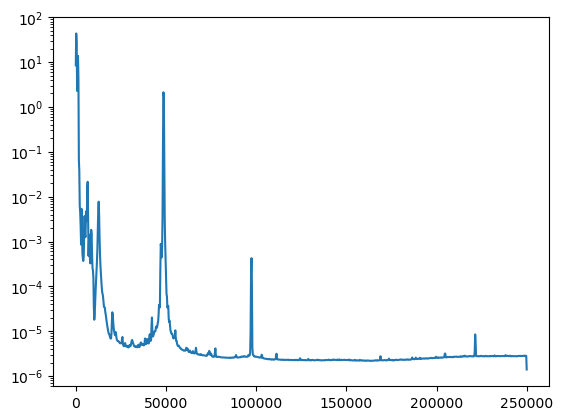

In [461]:
from scipy.signal import welch

dtt = 2e-6
ff, pp = welch(zz, fs=500000, nperseg=2**11)
plt.plot(ff, pp, label='Z backward')
# plt.xlim(200000, 225000)
plt.yscale('log')

-1036.6737006435073 -152.17024133187664 1049.6219312938272


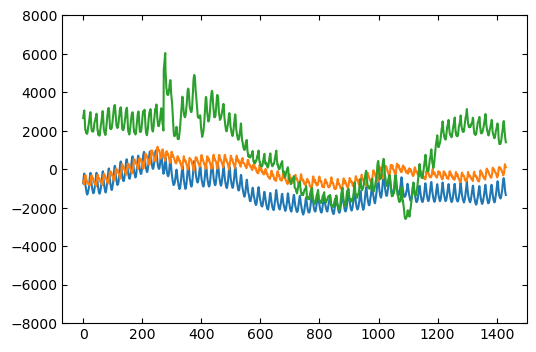

In [457]:
nfile = 1432

sphere = 'sphere_20250103'
dataset = '20250115_8e-9mbar_0e_alignment1_long'
prefix = '20250115_d_'

aa, bb, cc = [np.empty(nfile) for i in range(3)]
for file_idx in range(nfile):
    file_name = rf"E:\dm_data\{sphere}\{dataset}/{prefix}{file_idx}.hdf5"
    f = h5py.File(file_name, 'r')
    
    aa[file_idx] = f['data'].attrs['channel_a_mean_mv']
    bb[file_idx] = f['data'].attrs['channel_b_mean_mv']
    cc[file_idx] = f['data'].attrs['channel_c_mean_mv']

    f.close()

fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(aa)
ax.plot(bb)
ax.plot(cc)
ax.set_ylim(-8000, 8000)

ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')

print(np.mean(aa), np.mean(bb), np.mean(cc))

In [11]:
file_name = r"E:\pulse_waveform\20241125_quantum_composers\20241125_200ns_20v_0.hdf5"
f = h5py.File(file_name, 'r')

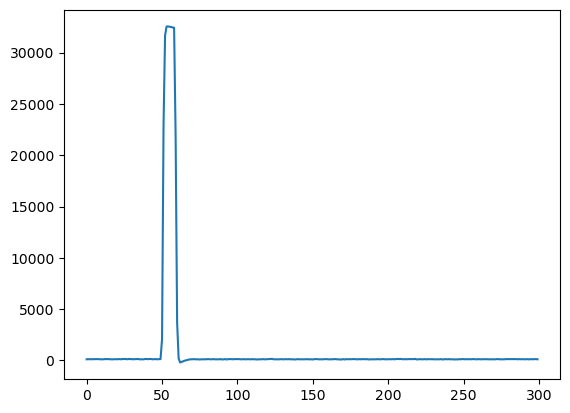

In [12]:
plt.plot(f['data']['channel_g_99'][:])

In [13]:
f.close()

In [ ]:
3e-5 / np.sqrt(10e-6) / 2000 / 500e-3 # V

6.708203932499369e-06

In [22]:
timestamp = f['data'].attrs['timestamp']
dt = f['data'].attrs['delta_t']
fs = int(np.ceil(1 / dt))

# aa = f['data']['channel_a'] * f['data']['channel_a'].attrs['adc2mv']
# bb = f['data']['channel_b'] * f['data']['channel_b'].attrs['adc2mv']
# cc = f['data']['channel_c'] * f['data']['channel_c'].attrs['adc2mv']
dd = f['data']['channel_d'] * f['data']['channel_d'].attrs['adc2mv']
# ee = f['data']['channel_e'] * f['data']['channel_e'].attrs['adc2mv']
# ff = f['data']['channel_f'] * f['data']['channel_f'].attrs['adc2mv']
gg = f['data']['channel_g'] * f['data']['channel_g'].attrs['adc2mv']
# zz_bp = bandpass_filtered(dd, fs, 30000, 100000)


Text(0.5, 0, 'Idx')

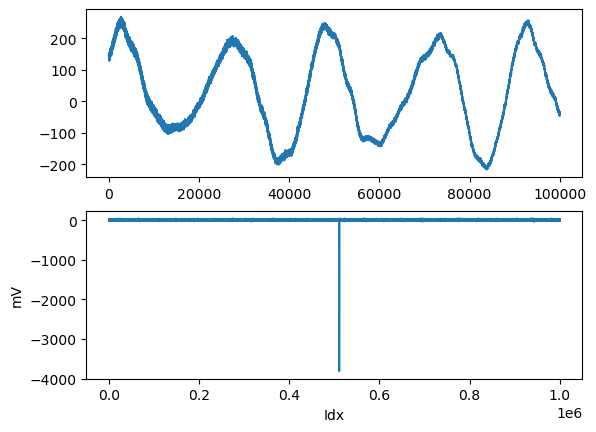

In [23]:
fig, axes = plt.subplots(2, 1)

# axes[0].plot(aa)
# axes[0].plot(bb)
# axes[0].plot(cc)
axes[0].plot(dd[:100000])

# axes[1].plot(ee)
# axes[1].plot(ff)
axes[1].plot(gg[:1000000])

plt.ylabel('mV')
plt.xlabel('Idx')

In [24]:
del dd, gg